<a href="https://colab.research.google.com/github/ryandhikafm/DTI-Telkom/blob/Clustering/Clustering_Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

Kasus kali ini untuk menentukan Mall Customer Segmentation

Dataset bisa didapatkan di link berikut https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Tidak terdapat data kosong

In [6]:
df['Annual Income (k$)'].max()

137

In [7]:
df['Spending Score (1-100)'].max()

99

In [8]:
df['Age'].max()

70

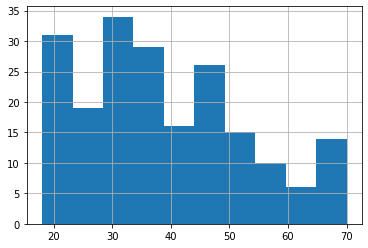

In [9]:
df['Age'].hist()

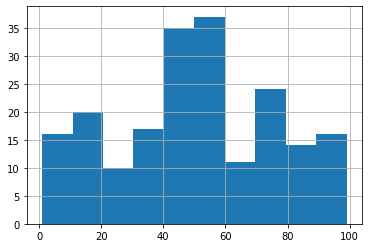

In [10]:
df['Spending Score (1-100)'].hist()

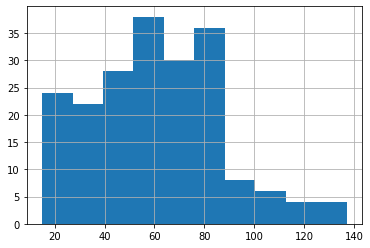

In [11]:
df['Annual Income (k$)'].hist()

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Dari hasil diatas diketahui Customer dengan umur 18-30an yang sangat dominan. Orang-orang dengan pendapatan 20.000-80.000an dollar yang paling dominan mengunjungi mall

Mengganti nama kolom untuk memudahkan dalam proses mengolah data

In [13]:
df = df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Spending_Score"})

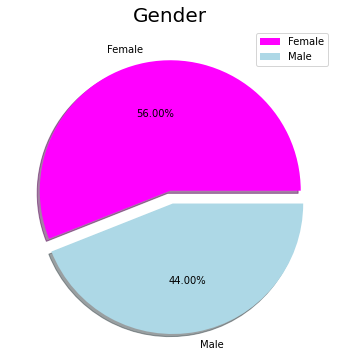

In [14]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['Magenta', 'LightBlue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Jelas terlihat bahwa perempuan lebih dominan disini. Di mall ini customer perempuan lebih banyak dibanding laki-laki

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


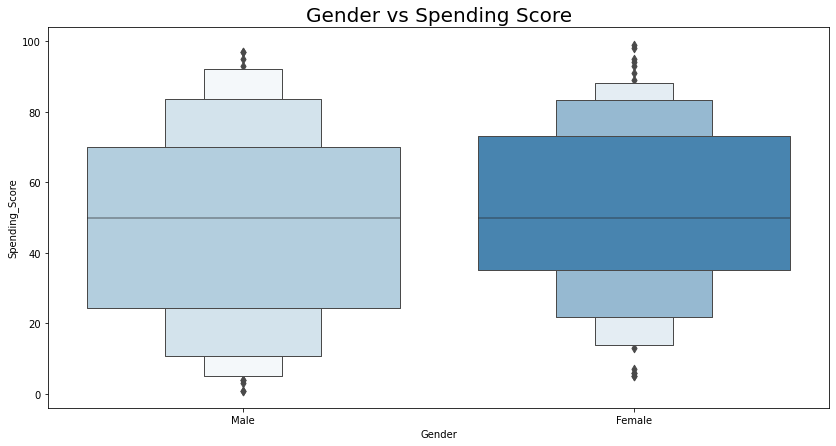

In [15]:
plt.rcParams['figure.figsize'] = (14, 7)
sns.boxenplot(df['Gender'], df['Spending_Score'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

Kebanyakan laki-laki akan menghabiskan 25.000 - 70.000 US Dollars dimana perempuan akan mengeluarkan sebesar 35.000 - 75.000 US Dollars. Perempuan lebih royal dalam berbelanja

## Data Preprocessing & Modeling

Disini saya ingin membandingkan hasil data yang tidak di scalling dengan yang telah di scalling

### Tanpa Scalling

In [16]:
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
#Mengambil kolom income dan spending_score

from sklearn.cluster import KMeans

x_1 = df.iloc[:, [3, 4]].values

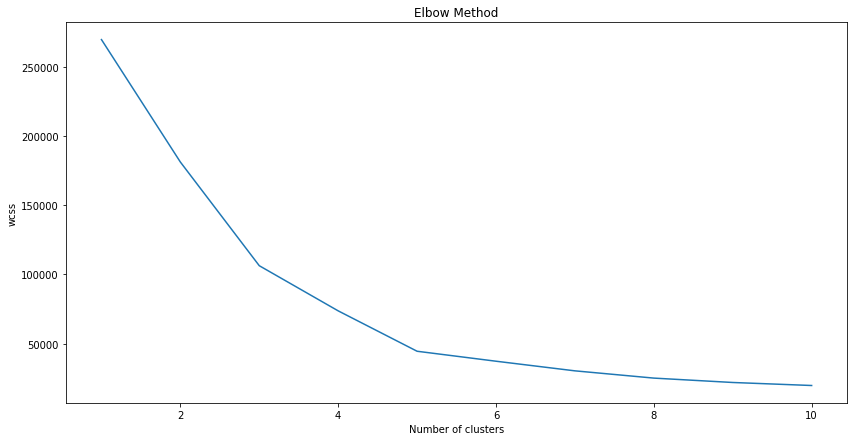

In [18]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_1)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Ada 5 cluster menggunakan teknik elbow method

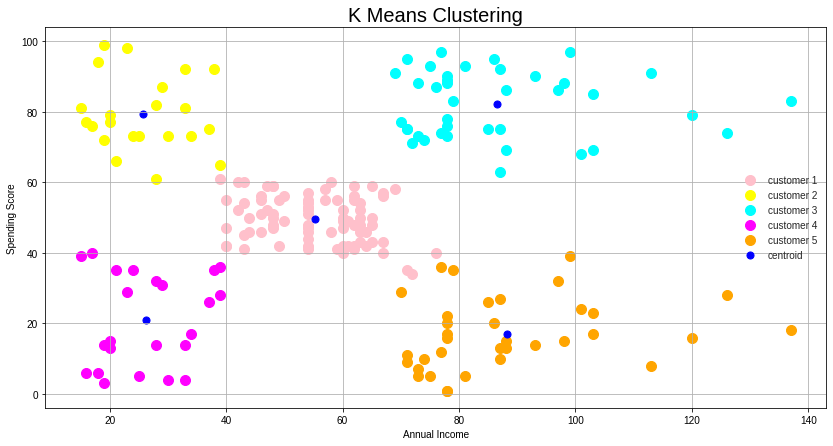

In [19]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x_1)

plt.scatter(x_1[y_means == 0, 0], x_1[y_means == 0, 1], s = 100, c = 'pink', label = 'customer 1')
plt.scatter(x_1[y_means == 1, 0], x_1[y_means == 1, 1], s = 100, c = 'yellow', label = 'customer 2')
plt.scatter(x_1[y_means == 2, 0], x_1[y_means == 2, 1], s = 100, c = 'cyan', label = 'customer 3')
plt.scatter(x_1[y_means == 3, 0], x_1[y_means == 3, 1], s = 100, c = 'magenta', label = 'customer 4')
plt.scatter(x_1[y_means == 4, 0], x_1[y_means == 4, 1], s = 100, c = 'orange', label = 'customer 5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.style.use('seaborn')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [20]:
y_means

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [21]:
#Melihat hasil clustering pada dataframe

df['Cluster'] = y_means
df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [22]:
#Melihat customer segmentation pada cluster 0

df[df['Cluster'] == 0].head()

,CustomerID,Gender,Age,Income,Spending_Score,Cluster
43,44,Female,31,39,61,0
46,47,Female,50,40,55,0
47,48,Female,27,40,47,0
48,49,Female,29,40,42,0
49,50,Female,31,40,42,0


In [23]:
def plotClusters(xAxis, yAxis):
    plt.scatter(df[df['Cluster']==0][xAxis], df[df['Cluster']==0][yAxis], s=40, c='red', label ='Cluster 1')
    plt.scatter(df[df['Cluster']==1][xAxis], df[df['Cluster']==1][yAxis], s=40, c='blue', label ='Cluster 2')
    plt.scatter(df[df['Cluster']==2][xAxis], df[df['Cluster']==2][yAxis], s=40, c='green', label ='Cluster 3')
    plt.scatter(df[df['Cluster']==3][xAxis], df[df['Cluster']==3][yAxis], s=40, c='magenta', label ='Cluster 4')
    plt.scatter(df[df['Cluster']==4][xAxis], df[df['Cluster']==4][yAxis], s=40, c='gold', label ='Cluster 5')
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)    
    plt.legend()   

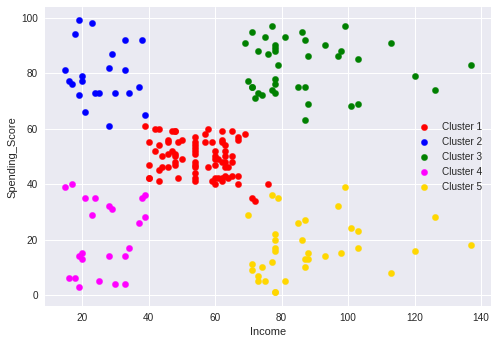

In [24]:
plotClusters('Income', 'Spending_Score')

In [25]:
#Mengambil kolom age dan income

x_2 = df.iloc[:, [2, 4]].values

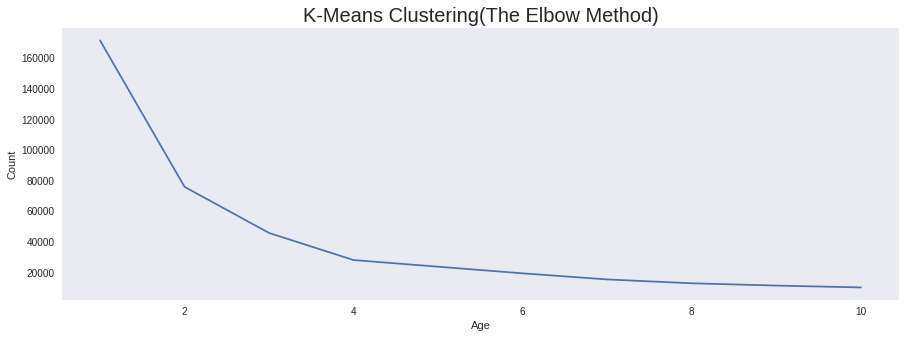

In [26]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_2)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

Terdapat 2 cluster berdasarkan elbow method

In [27]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x_2)

In [28]:
ymeans

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [29]:
df['Cluster'] = ymeans
df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


In [30]:
def plotClusters_4(xAxis, yAxis):
    plt.scatter(df[df['Cluster']==0][xAxis], df[df['Cluster']==0][yAxis], s=40, c='red', label ='Cluster 1')
    plt.scatter(df[df['Cluster']==1][xAxis], df[df['Cluster']==1][yAxis], s=40, c='blue', label ='Cluster 2')
    #plt.scatter(df[df['Cluster']==2][xAxis], df[df['Cluster']==2][yAxis], s=40, c='green', label ='Cluster 3')
    #plt.scatter(df[df['Cluster']==3][xAxis], df[df['Cluster']==3][yAxis], s=40, c='magenta', label ='Cluster 4')
    #plt.scatter(df[df['Cluster']==4][xAxis], df[df['Cluster']==4][yAxis], s=40, c='gold', label ='Cluster 5')
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)    
    plt.legend()  

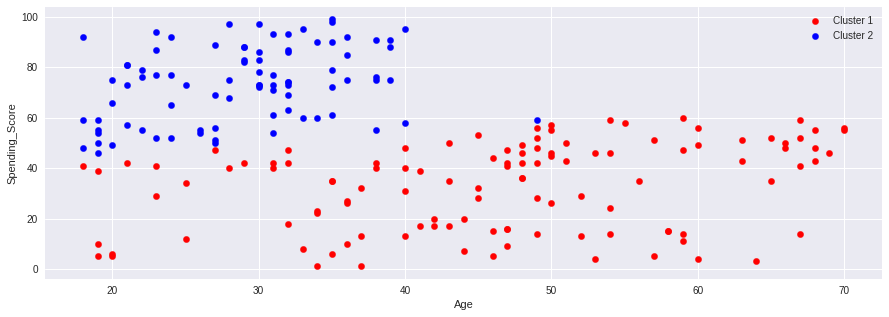

In [33]:
plotClusters_4('Age', 'Spending_Score')

In [31]:
df = df.drop(columns = 'Cluster')

### Dengan Scalling

In [32]:
df_scale = df.copy()

Disini untuk proses scalling saya menggunakan standardisasi

In [33]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

num_cols = ['Age','Income','Spending_Score']
# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(df_scale[[i]])
    
    # transform the training data column
    df_scale[i] = scale.transform(df_scale[[i]])
  


Mengecek hasil dari standardisasi

In [34]:
df_scale.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


In [35]:
x_scale_1 = df_scale.iloc[:, [2, 4]].values

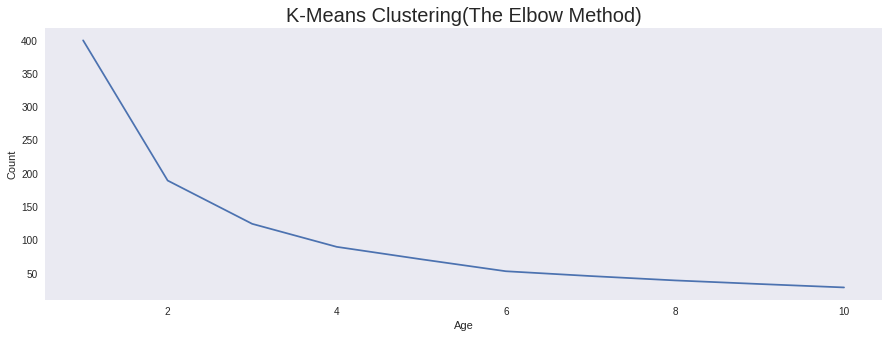

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_scale_1)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

Pada percobaan kali ini saya tidak hanya menggunakan elbow method tapi juga menggunakan silhoutte method. Hasil keduanya sama yaitu nilai k=2

In [37]:
# Silhoutte Method
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(x_scale_1)
    label = kmeans.labels_
    sil_coeff = silhouette_score(x_scale_1, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.4721271643062346
For n_clusters=3, The Silhouette Coefficient is 0.43952990002101927
For n_clusters=4, The Silhouette Coefficient is 0.4383860846531993
For n_clusters=5, The Silhouette Coefficient is 0.42369111306686563
For n_clusters=6, The Silhouette Coefficient is 0.4566283030197353
For n_clusters=7, The Silhouette Coefficient is 0.40694175606084365
For n_clusters=8, The Silhouette Coefficient is 0.4048295376259236
For n_clusters=9, The Silhouette Coefficient is 0.4074025838903571
For n_clusters=10, The Silhouette Coefficient is 0.43272436918760687


In [38]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x_scale_1)

In [39]:
ymeans

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [40]:
df_scale['Cluster'] = ymeans
df_scale.head()

,CustomerID,Gender,Age,Income,Spending_Score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,1
1,2,Male,-1.281035,-1.738999,1.195704,1
2,3,Female,-1.352802,-1.700830,-1.715913,0
3,4,Female,-1.137502,-1.700830,1.040418,1
4,5,Female,-0.563369,-1.662660,-0.395980,1


In [41]:
def plotClustersScale_2(xAxis, yAxis):
    plt.scatter(df_scale[df_scale['Cluster']==0][xAxis], df_scale[df_scale['Cluster']==0][yAxis], s=40, c='red', label ='Cluster 1')
    plt.scatter(df_scale[df_scale['Cluster']==1][xAxis], df_scale[df_scale['Cluster']==1][yAxis], s=40, c='blue', label ='Cluster 2')
    #plt.scatter(df_scale[df['Cluster']==2][xAxis], df[df['Cluster']==2][yAxis], s=40, c='green', label ='Cluster 3')
    #plt.scatter(df[df['Cluster']==3][xAxis], df[df['Cluster']==3][yAxis], s=40, c='magenta', label ='Cluster 4')
    #plt.scatter(df[df['Cluster']==4][xAxis], df[df['Cluster']==4][yAxis], s=40, c='gold', label ='Cluster 5')
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)    
    plt.legend()  

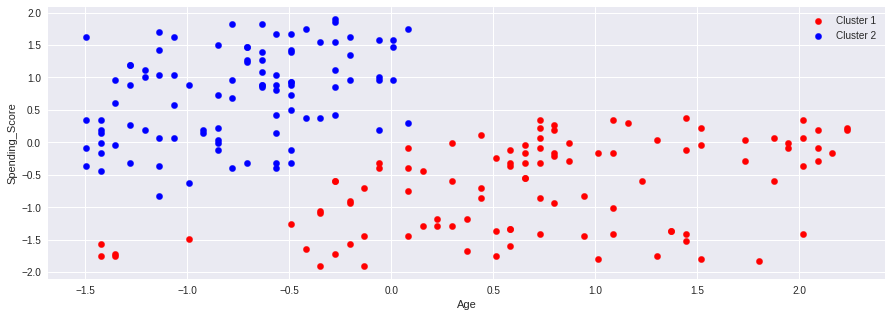

In [42]:
plotClustersScale_2('Age', 'Spending_Score')

Bisa dilihat hasil clustering dengan dan tanpa standardisasi akan menghasilkan kesimpulan yang sama

In [43]:
df_scale = df_scale.drop(columns = 'Cluster')

In [44]:
x_scale_2 = df_scale.iloc[:, [3, 4]].values

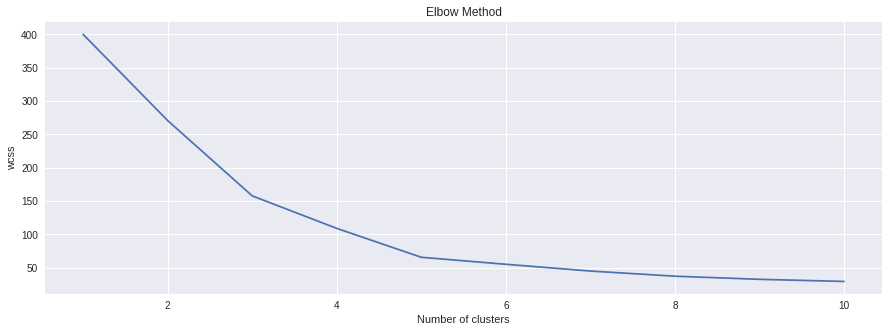

In [45]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_scale_2)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [46]:
# Silhoutte Method

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(x_scale_2)
    label = kmeans.labels_
    sil_coeff = silhouette_score(x_scale_2, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.29512063001659344
For n_clusters=3, The Silhouette Coefficient is 0.46658474419000145
For n_clusters=4, The Silhouette Coefficient is 0.4939069237513199
For n_clusters=5, The Silhouette Coefficient is 0.5546571631111091
For n_clusters=6, The Silhouette Coefficient is 0.5380630705007141
For n_clusters=7, The Silhouette Coefficient is 0.5281492781108291
For n_clusters=8, The Silhouette Coefficient is 0.4541279523637649
For n_clusters=9, The Silhouette Coefficient is 0.455477460588866
For n_clusters=10, The Silhouette Coefficient is 0.4476280825932578


In [47]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x_scale_2)

In [48]:
ymeans

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [49]:
df_scale["Cluster"] = ymeans
df_scale.head()

,CustomerID,Gender,Age,Income,Spending_Score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,4
1,2,Male,-1.281035,-1.738999,1.195704,1
2,3,Female,-1.352802,-1.700830,-1.715913,4
3,4,Female,-1.137502,-1.700830,1.040418,1
4,5,Female,-0.563369,-1.662660,-0.395980,4


In [50]:
def plotClustersScale_5(xAxis, yAxis):
    plt.scatter(df_scale[df_scale['Cluster']==0][xAxis], df_scale[df_scale['Cluster']==0][yAxis], s=40, c='red', label ='Cluster 1')
    plt.scatter(df_scale[df_scale['Cluster']==1][xAxis], df_scale[df_scale['Cluster']==1][yAxis], s=40, c='blue', label ='Cluster 2')
    plt.scatter(df_scale[df_scale['Cluster']==2][xAxis], df_scale[df_scale['Cluster']==2][yAxis], s=40, c='green', label ='Cluster 3')
    plt.scatter(df_scale[df_scale['Cluster']==3][xAxis], df_scale[df_scale['Cluster']==3][yAxis], s=40, c='magenta', label ='Cluster 4')
    plt.scatter(df_scale[df_scale['Cluster']==4][xAxis], df_scale[df_scale['Cluster']==4][yAxis], s=40, c='gold', label ='Cluster 5')
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)    
    plt.legend() 

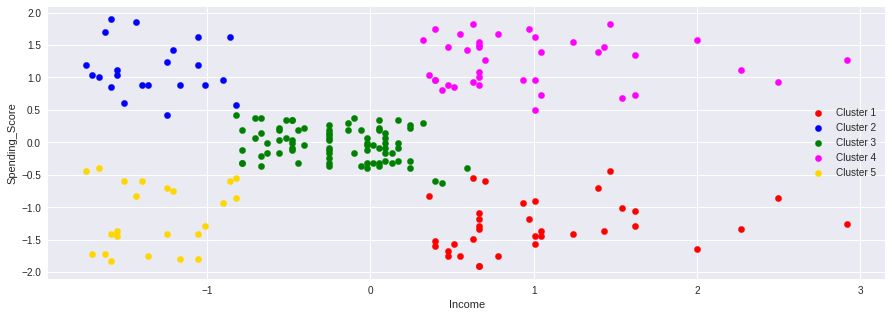

In [51]:
plotClustersScale_5("Income", "Spending_Score")

Sekali lagi hasil ini membuktikan bahwa hasil clustering dengan dan tanpa standardisasi akan menghasilkan kesimpulan yang sama

In [52]:
df_scale.head()

,CustomerID,Gender,Age,Income,Spending_Score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,4
1,2,Male,-1.281035,-1.738999,1.195704,1
2,3,Female,-1.352802,-1.700830,-1.715913,4
3,4,Female,-1.137502,-1.700830,1.040418,1
4,5,Female,-0.563369,-1.662660,-0.395980,4


In [53]:
df_scale = df_scale.drop(columns = 'Cluster')

In [54]:
df_scale.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


Kali ini saya akan menggunakan 3 kolom yaitu Age, Income, dan Spending_Score untuk menentukan customer segmentation

In [58]:
x_scale_3 = df_scale[['Age' , 'Income' ,'Spending_Score']].iloc[: , :].values

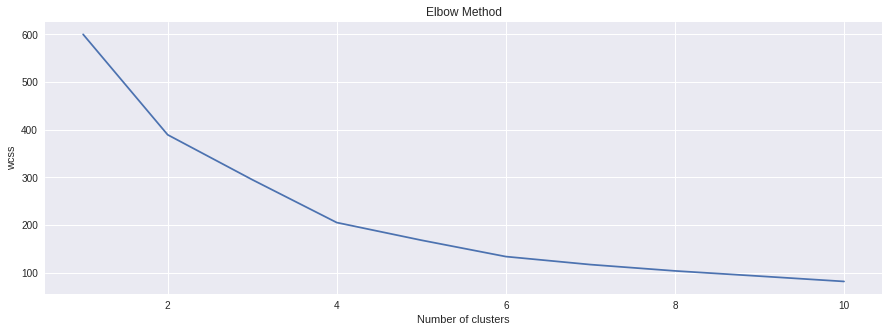

In [59]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_scale_3)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [60]:
# Silhoutte Method

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(x_scale_3)
    label = kmeans.labels_
    sil_coeff = silhouette_score(x_scale_3, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.33547192894004574
For n_clusters=3, The Silhouette Coefficient is 0.357793388710272
For n_clusters=4, The Silhouette Coefficient is 0.4039582785148566
For n_clusters=5, The Silhouette Coefficient is 0.41664341513732767
For n_clusters=6, The Silhouette Coefficient is 0.42742814991580175
For n_clusters=7, The Silhouette Coefficient is 0.419348616090002
For n_clusters=8, The Silhouette Coefficient is 0.4109827482212367
For n_clusters=9, The Silhouette Coefficient is 0.4206439140308163
For n_clusters=10, The Silhouette Coefficient is 0.4282104051270849


Bersarkan hasil elbow method dan silhoutte method nilai k=6

In [61]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x_scale_3)

In [62]:
ymeans

array([1, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 2, 1, 5, 4,
       5, 1, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 3, 4, 3, 0, 3, 0, 3, 0, 3,
       4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [63]:
df_scale['Cluster'] = ymeans
df_scale.head()

,CustomerID,Gender,Age,Income,Spending_Score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,1
1,2,Male,-1.281035,-1.738999,1.195704,1
2,3,Female,-1.352802,-1.700830,-1.715913,5
3,4,Female,-1.137502,-1.700830,1.040418,1
4,5,Female,-0.563369,-1.662660,-0.395980,5


In [64]:
#Melihat semua data dengan cluster 0

df_scale[df_scale['Cluster'] == 0].head()

,CustomerID,Gender,Age,Income,Spending_Score,Cluster
126,127,Male,0.297832,0.398489,-0.590088,0
128,129,Male,1.446099,0.398489,-1.521805,0
130,131,Male,0.584899,0.398489,-1.599448,0
134,135,Male,-1.352802,0.474828,-1.754735,0
136,137,Female,0.369598,0.474828,-1.677091,0


In [65]:
#Menghitung jumlah total customer yang termasuk pada cluster 0

df_scale[df_scale['Cluster'] == 0].count()

CustomerID        34
Gender            34
Age               34
Income            34
Spending_Score    34
Cluster           34
dtype: int64

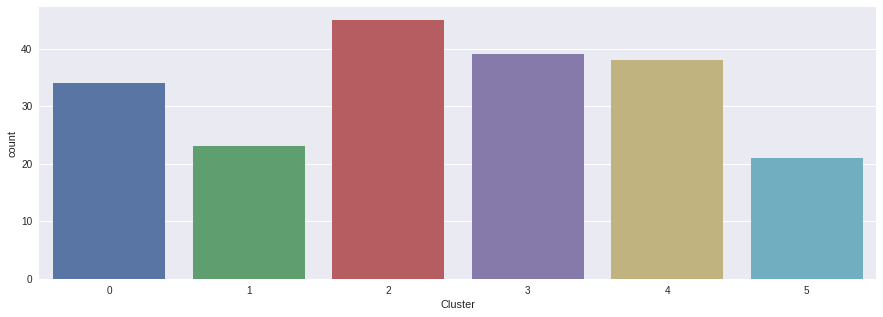

In [66]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(x = 'Cluster' , data = df_scale)
plt.show()

Dari grafik diatas bisa kita katakan kalau cluster 2 yang paling banyak jumlah customernya sedangkan cluster 5 yang paling sedikit jumlah customernya. Pihak mall dapat memprioritaskan strategi bisnis untuk menunjang aktivitas belanja customer mall yang terdapat pada cluster 2, 3, dan 4.